In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [ ]:
file_path = 'MS_01_T0_TCRB.tsv'
n_rows = 10000
# Read the CSV file
df = pd.read_csv(file_path, sep = "\t", nrows = n_rows)

In [ ]:
df = df.dropna(subset=['aminoAcid'])

In [ ]:
df.to_csv('MS_without_na.csv', index=False)

In [77]:
y = pd.read_csv("MS_without_na.csv")

In [78]:
y

,nucleotide,aminoAcid,count (templates/reads),frequencyCount (%),cdr3Length,vMaxResolved,vFamilyName,vGeneName,vGeneAllele,vFamilyTies,...,jOrphon,vFunction,dFunction,jFunction,fractionNucleated,vAlignLength,vAlignSubstitutionCount,vAlignSubstitutionIndexes,vAlignSubstitutionGeneThreePrimeIndexes,vSeqWithMutations
0,GAACTGAACATGAGCTCCTTGGAGCTGGGGGACTCAGCCCTGTACT...,CASPMVHGYTF,155,0.004317,33,TCRBV13-01*01,TCRBV13,TCRBV13-01,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCAGCT...,CASSFGSTYSNQPQHF,106,0.002997,48,TCRBV05-06*01,TCRBV05,TCRBV05-06,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGGGACTCAGCTGTGTACTTCTGTGCCAGCAGTTCCCCCCCCTTGG...,CASSSPPLDSSSIRNTEAFF,169,0.004699,60,TCRBV12,TCRBV12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,CASSLAGTPYNEQFF,78,0.002219,45,TCRBV27-01*01,TCRBV27,TCRBV27-01,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CACGCCCTGCAGCCAGAAGACTCAGCCCTGTATCTCTGCGCCAGCA...,CASSQARGPATEAFF,37,0.001042,45,TCRBV04-01*01,TCRBV04,TCRBV04-01,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,CGCTCACCAGGCCTGGGGGACGCAGCCATGTACCTGTGTGCCACCA...,CATSTERGVNTEAFF,1,0.000015,45,TCRBV15-01*01,TCRBV15,TCRBV15-01,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8450,CTGGAGTCCGCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCA...,CAISTQGDNEKLFF,2,0.000057,42,TCRBV10-03*01,TCRBV10,TCRBV10-03,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8451,GCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGAAACT...,CASRNLGQGGSGNTIYF,1,0.000037,51,TCRBV06,TCRBV06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8452,AATGTGAACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTG...,CASSLPHGDTQYF,1,0.000011,39,TCRBV05-06*01,TCRBV05,TCRBV05-06,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
y = y[~y['aminoAcid'].astype(str).str.contains(r'\*')]

In [82]:
y_15 = y[y['aminoAcid'].astype(str).str.len() == 15]

In [84]:
y = y_15["frequencyCount (%)"].tolist()

In [85]:
y

[0.0022194594801369,
 0.001042021307117,
 0.0001621942122678,
 0.0001009888491479,
 0.0002930206759367,
 7.038616758793489e-05,
 5.355469272995047e-05,
 0.0006640781898513,
 2.5247212286976647e-05,
 0.0008958935026681,
 1.9126675974982308e-05,
 1.8361608935983017e-05,
 1.683147485798443e-05,
 1.98917430139816e-05,
 1.3006139662987967e-05,
 1.7596541896983722e-05,
 1.3771206701987262e-05,
 1.3006139662987967e-05,
 1.606640781898514e-05,
 1.606640781898514e-05,
 1.5301340779985846e-05,
 0.0001576038100338,
 1.2241072623988676e-05,
 6.732589943193773e-05,
 9.10429776409158e-05,
 8.186217317292428e-05,
 1.3771206701987262e-05,
 1.0710938545990092e-05,
 1.3771206701987262e-05,
 0.0001025189832259,
 1.4536273740986556e-05,
 1.0710938545990092e-05,
 0.0003060268155997,
 1.3771206701987262e-05,
 0.0001270011284738,
 1.0710938545990092e-05,
 1.4536273740986556e-05,
 2.371707820897806e-05,
 1.3771206701987262e-05,
 1.2241072623988676e-05,
 9.9458715069908e-06,
 2.1421877091980185e-05,
 1.3006139

In [4]:
amino_acids = np.loadtxt("matrix.txt", delimiter=' ')

In [5]:
amino_acids

array([[19., 20.,  5., ...,  7., 16., 16.],
       [19., 20.,  5., ..., 20., 16., 16.],
       [19.,  5.,  3., ...,  7.,  1., 16.],
       ...,
       [19., 20.,  5., ..., 11., 16., 16.],
       [19., 20.,  5., ...,  7., 14., 16.],
       [19., 20.,  4., ..., 20., 16., 16.]])

In [ ]:
#amino_acids = df["aminoAcid"].tolist()

In [ ]:
#amino_acids = [item for item in amino_acids if '*' not in item]

In [ ]:
#amino_acids_length_15 = [item for item in amino_acids if len(item) == 15]

In [6]:
amino_acids_length_15 = amino_acids

In [7]:
unique_letters = list(set(letter for item in amino_acids_length_15 for letter in item))

In [ ]:
# Create a StringLookup layer to map letters to integer indices
"""letter_lookup = tf.keras.layers.StringLookup()

# Adapt the layer to the unique letters
letter_lookup.adapt(unique_letters)

# Create the reverse mapping from indices to letters (optional for decoding)
reverse_lookup = tf.keras.layers.StringLookup(vocabulary=letter_lookup.get_vocabulary(), invert=True)

# Define a function to transform a string into a sequence of numbers
def encode_string(input_string):
    return letter_lookup(tf.strings.unicode_split(input_string, 'UTF-8')).numpy()

# Transform each string in the list into a sequence of numbers
encoded_list = [encode_string(s) for s in amino_acids_length_15]

# Display the mappings and the encoded sequences
print("Unique letters:")
print(unique_letters)
print("\nLetter to number mapping:")
print({letter: letter_lookup(letter).numpy() for letter in unique_letters})
print("\nEncoded sequences:")
for original, encoded in zip(amino_acids_length_15, encoded_list):
    print(f"{original} -> {encoded}")
"""

Unique letters:
['P', 'C', 'D', 'N', 'Q', 'I', 'S', 'W', 'M', 'G', 'A', 'R', 'F', 'E', 'H', 'T', 'Y', 'V', 'K', 'L']

Letter to number mapping:
{'P': 8, 'C': 19, 'D': 18, 'N': 9, 'Q': 7, 'I': 13, 'S': 5, 'W': 2, 'M': 10, 'G': 15, 'A': 20, 'R': 6, 'F': 16, 'E': 17, 'H': 14, 'T': 4, 'Y': 1, 'V': 3, 'K': 12, 'L': 11}

Encoded sequences:
CASSLAGTPYNEQFF -> [19 20  5  5 11 20 15  4  8  1  9 17  7 16 16]
CASSQARGPATEAFF -> [19 20  5  5  7 20  6 15  8 20  4 17 20 16 16]
CSVVRVGETTDTQYF -> [19  5  3  3  6  3 15 17  4  4 18  4  7  1 16]
CAWSVAGLSGDEQYF -> [19 20  2  5  3 20 15 11  5 15 18 17  7  1 16]
CASSMEVGRTDTQYF -> [19 20  5  5 10 17  3 15  6  4 18  4  7  1 16]
CAWSVLGSGANVLTF -> [19 20  2  5  3 11 15  5 15 20  9  3 11  4 16]
CSIWASGLSSYEQYF -> [19  5 13  2 20  5 15 11  5  5  1 17  7  1 16]
CASSSPDILNTEAFF -> [19 20  5  5  5  8 18 13 11  9  4 17 20 16 16]
CAWSRIRAPRTEAFF -> [19 20  2  5  6 13  6 20  8  6  4 17 20 16 16]
CASSIDPEYTDTQYF -> [19 20  5  5 13 18  8 17  1  4 18  4  7  1 16]
CAWT

In [8]:
encoded_list = amino_acids


In [110]:
amino_acids = amino_acids -1

In [121]:
training_set_X = amino_acids[:1387,:4]
test_set_X = amino_acids[1388:,:4]
training_set_y = amino_acids[:1387,4]
test_set_y = amino_acids[1388:,4]

In [86]:
#sequence_length = np.array(encoded_list).shape[1] - 1

print("Input sequences (X):")
print(X)
print("\nTarget sequences (y):")
print(y)

Input sequences (X):
[[19. 20.  5. ...  7. 16. 16.]
 [19. 20.  5. ... 20. 16. 16.]
 [19.  5.  3. ...  7.  1. 16.]
 ...
 [19. 20.  5. ... 11. 16. 16.]
 [19. 20.  5. ...  7. 14. 16.]
 [19. 20.  4. ... 20. 16. 16.]]

Target sequences (y):
[2.21945948e-03 1.04202131e-03 1.62194212e-04 ... 1.30061397e-05
 1.22410726e-05 1.45362737e-05]


In [129]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define parameters
vocab_size = 20  # Assuming 26 letters plus a special character (e.g., space or padding)
embedding_dim = 50
rnn_units = 64
sequence_length = 4
batch_size = 1  # Use batch size  for prediction later

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    LSTM(rnn_units, return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 4, 50)             1000      
                                                                 
 lstm_19 (LSTM)              (None, 64)                29440     
                                                                 
 dense_19 (Dense)            (None, 20)                1300      
                                                                 
Total params: 31740 (123.98 KB)
Trainable params: 31740 (123.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
training_set_y

array([], shape=(0, 15), dtype=float64)

In [133]:
# Train the model
history =  model.fit(training_set_X, training_set_y, epochs=100, batch_size = 1)

Epoch 1/100
1387/1387 [==============================] - 4s 3ms/step - loss: 2.2252 - accuracy: 0.2646
Epoch 2/100
1387/1387 [==============================] - 4s 3ms/step - loss: 2.2247 - accuracy: 0.2581
Epoch 3/100
1387/1387 [==============================] - 6s 4ms/step - loss: 2.2235 - accuracy: 0.2639
Epoch 4/100
1387/1387 [==============================] - 4s 3ms/step - loss: 2.2235 - accuracy: 0.2639
Epoch 5/100
1387/1387 [==============================] - 4s 3ms/step - loss: 2.2237 - accuracy: 0.2617
Epoch 6/100
1387/1387 [==============================] - 5s 4ms/step - loss: 2.2282 - accuracy: 0.2646
Epoch 7/100
1387/1387 [==============================] - 4s 3ms/step - loss: 2.2237 - accuracy: 0.2610
Epoch 8/100
1387/1387 [==============================] - 4s 3ms/step - loss: 2.2235 - accuracy: 0.2581
Epoch 9/100
1387/1387 [==============================] - 5s 4ms/step - loss: 2.2233 - accuracy: 0.2624
Epoch 10/100
1387/1387 [==============================] - 4s 3ms/step - l

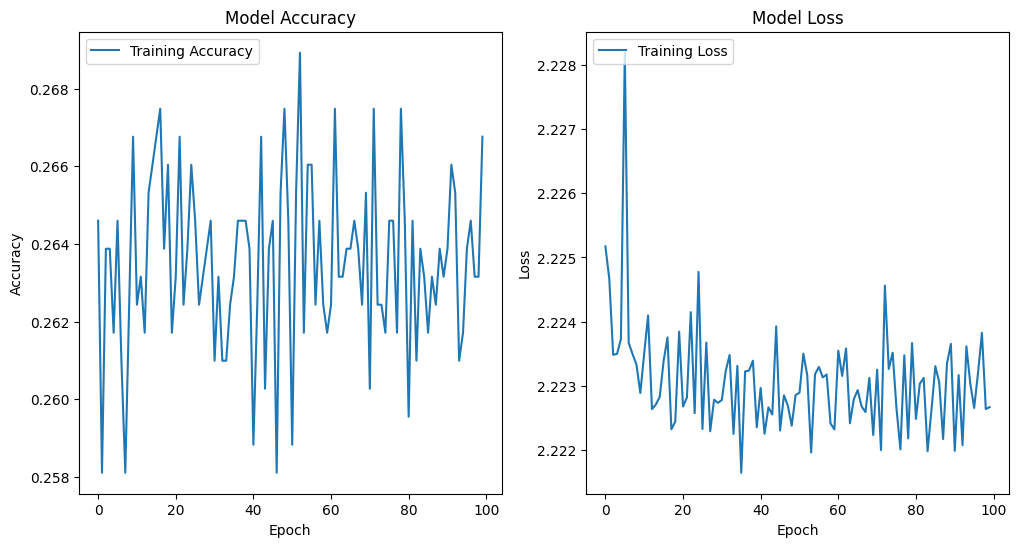

In [135]:
# Plot the training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

In [137]:
training_set_X_2 = amino_acids[:1387,:5]
test_set_X_2 = amino_acids[1388:,:5]
training_set_y_2 = amino_acids[:1387,5]
test_set_y_2 = amino_acids[1388:,5]

In [138]:
# Train the model
history_2 =  model.fit(training_set_X_2, training_set_y_2, epochs=100, batch_size = 1)

Epoch 1/100
1387/1387 [==============================] - 7s 4ms/step - loss: 6.0623 - accuracy: 0.1312
Epoch 2/100
1387/1387 [==============================] - 5s 3ms/step - loss: 4.4131 - accuracy: 0.1759
Epoch 3/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.8451 - accuracy: 0.1839
Epoch 4/100
1387/1387 [==============================] - 5s 4ms/step - loss: 3.5097 - accuracy: 0.1932
Epoch 5/100
1387/1387 [==============================] - 5s 3ms/step - loss: 3.2597 - accuracy: 0.2141
Epoch 6/100
1387/1387 [==============================] - 6s 4ms/step - loss: 3.0755 - accuracy: 0.2098
Epoch 7/100
1387/1387 [==============================] - 5s 3ms/step - loss: 2.9365 - accuracy: 0.2264
Epoch 8/100
1387/1387 [==============================] - 5s 3ms/step - loss: 2.7902 - accuracy: 0.2502
Epoch 9/100
1387/1387 [==============================] - 6s 4ms/step - loss: 2.7395 - accuracy: 0.2574
Epoch 10/100
1387/1387 [==============================] - 5s 3ms/step - l

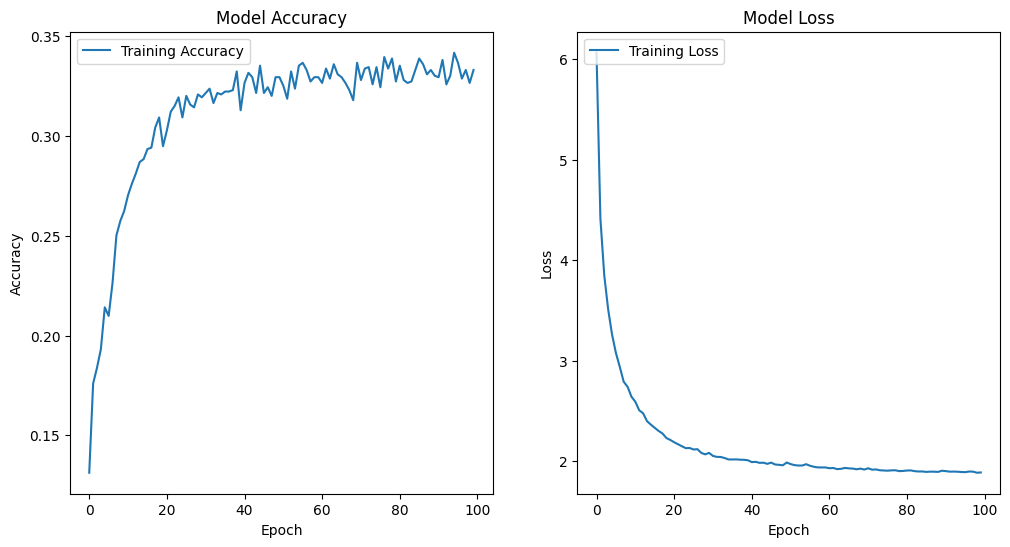

In [139]:
# Plot the training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()